In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
train = pd.read_csv('C:\\Users\\user\\workspace\\movie\\movies_train.csv')
test = pd.read_csv('C:\\Users\\user\\workspace\\movie\movies_test.csv')
submission = pd.read_csv('C:\\Users\\user\\workspace\\movie\\submission.csv')

In [25]:
train_null = train.drop('box_off_num', axis = 1).isnull().sum()/len(train)*100
train_null

title              0.000000
distributor        0.000000
genre              0.000000
release_time       0.000000
time               0.000000
screening_rat      0.000000
director           0.000000
dir_prev_bfnum    54.855196
dir_prev_num       0.000000
num_staff          0.000000
num_actor          0.000000
dtype: float64

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


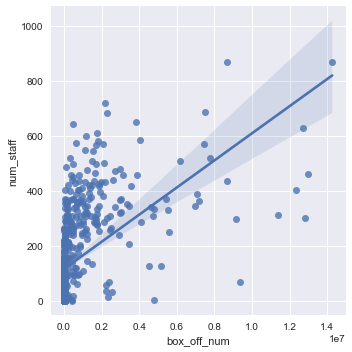

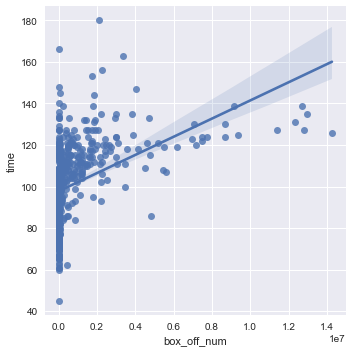

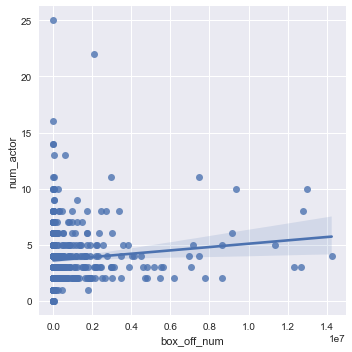

In [4]:
sns.lmplot(data=train, x="box_off_num", y="num_staff")
sns.lmplot(data=train, x="box_off_num", y="time")
sns.lmplot(data=train, x="box_off_num", y="num_actor")

In [5]:
train[train['num_staff'] > 800]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,NaN,0,869,4,14262766
505,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,1.843895e+06,3,868,2,8666208


In [6]:
train.drop(505, inplace=True)
train.drop(372, inplace=True)

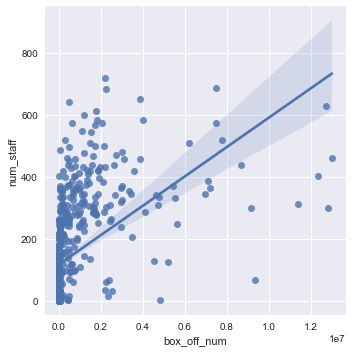

In [7]:
sns.lmplot(data=train, x="box_off_num", y="num_staff")

In [8]:
train[train['time'] > 160]  #원하는 수치 이상에 있는 열 확인

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
209,이끼,시네마서비스,드라마,2010-07-14,163,청소년 관람불가,강우석,NaN,0,353,8,3350311
377,내부자들: 디 오리지널,(주)쇼박스,느와르,2015-12-31,180,청소년 관람불가,우민호,3131902.0,3,382,3,2084844
438,산다,리틀빅픽처스,드라마,2015-05-21,166,청소년 관람불가,박정범,NaN,0,180,4,4398


In [9]:
train.drop(209, inplace=True) #삭제하고 싶은 열 제거
train.drop(377, inplace=True)
train.drop(438, inplace=True)

In [10]:
train[train['time'] < 50]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
545,남쪽으로 간다,시네마달,드라마,2012-11-15,45,청소년 관람불가,이송희일,3389.0,1,2,2,2919


In [11]:
train.drop(545, inplace=True)

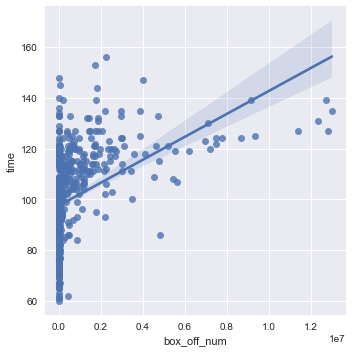

In [12]:
sns.lmplot(data=train, x='box_off_num', y='time') #시각화로 확인

In [13]:
train[train['num_actor'] > 20]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
80,바비,(주) 케이알씨지,드라마,2010-02-04,116,15세 관람가,에밀리오 에스테베즈,NaN,0,19,25,2821
486,뷰티 인사이드,(주)NEW,멜로/로맨스,2015-08-20,127,12세 관람가,백종열,4.210890e+06,3,572,22,2057896


In [14]:
train.drop(80, inplace=True)
train.drop(486, inplace=True)

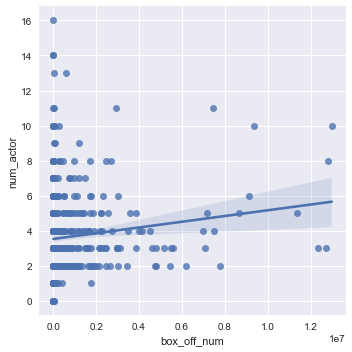

In [15]:
sns.lmplot(data=train, x='box_off_num', y='num_actor')

In [16]:
train[train['num_actor'] > 12]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
231,뒷담화: 감독이 미쳤어요,필라멘트 픽쳐스,드라마,2013-02-28,85,12세 관람가,이재용,495068.5,2,173,14,5317
246,풍경,인디스토리,다큐멘터리,2013-12-12,96,전체 관람가,장률,NaN,0,4,14,2178
273,퀴즈왕,시네마서비스,코미디,2010-09-16,121,15세 관람가,장진,NaN,0,273,13,573001
511,서울연애,서울독립영화제,드라마,2014-10-30,120,청소년 관람불가,최시형,NaN,0,103,16,1547
528,귀,CJ 엔터테인먼트,공포,2010-06-10,109,15세 관람가,김조광수,NaN,0,255,13,13108


In [17]:
train.drop(231, inplace=True)
train.drop(246, inplace=True)
train.drop(273, inplace=True)
train.drop(511, inplace=True)
train.drop(528, inplace=True)

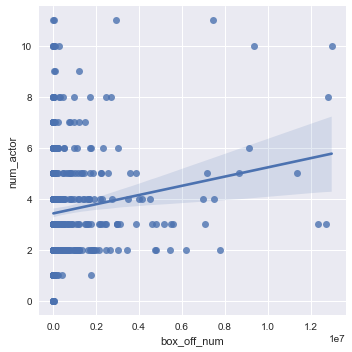

In [18]:
sns.lmplot(data=train, x='box_off_num', y='num_actor')

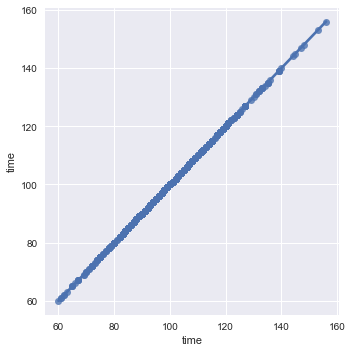

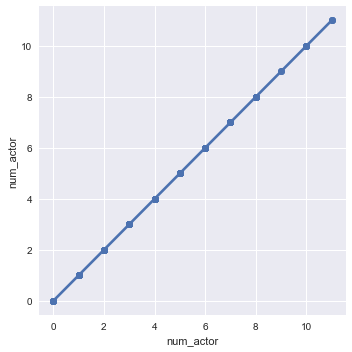

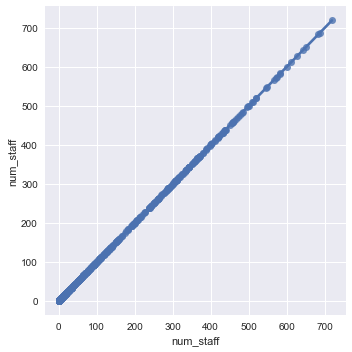

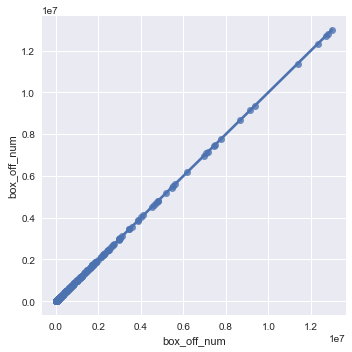

In [19]:
sns.lmplot(data=train, x="time", y="time")
sns.lmplot(data=train, x="num_actor", y="num_actor")
sns.lmplot(data=train, x="num_staff", y="num_staff")
sns.lmplot(data=train, x="box_off_num", y="box_off_num")

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           587 non-null    object 
 1   distributor     587 non-null    object 
 2   genre           587 non-null    object 
 3   release_time    587 non-null    object 
 4   time            587 non-null    int64  
 5   screening_rat   587 non-null    object 
 6   director        587 non-null    object 
 7   dir_prev_bfnum  265 non-null    float64
 8   dir_prev_num    587 non-null    int64  
 9   num_staff       587 non-null    int64  
 10  num_actor       587 non-null    int64  
 11  box_off_num     587 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 59.6+ KB
